Create slides with `` ipython nbconvert --to slides --post serve 02_numpy.ipynb ``

# Introduction to 

<a title="David Cournapeau [BSD (http://opensource.org/licenses/bsd-license.php)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:NumPy_logo.svg"><img width="512" alt="NumPy logo" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/512px-NumPy_logo.svg.png"></a>

Florencia Noriega


## Why NumPy?

* A powerfull N-dimension **array** object

* Basic and not so basic **math** operations
      * Aritmetics
      * **Linear** algebra operations
      * Random numbers, FFT, sorting, …

* **Basis** for other modules of Python stack

<img src="https://image.slidesharecdn.com/scientific-python-151121091532-lva1-app6892/95/scientific-python-28-638.jpg?cb=1448101074" alt="Python Scientific Stack" width="600"/>

### Convention

In [1]:
import numpy as np

## Numpy arrays are useful

* Homogenous data:
  - Experimental data sets
  - Simulations
  - …



**For example**:

NumPy can be much faster (typically $\approx 50\times$):

In [2]:
x = np.linspace(0, 9, 1001)

In [3]:
%%timeit
numpy_result = np.sqrt(x)

1.34 µs ± 29.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
from math import sqrt
x = list(x)

In [5]:
%%timeit
python_result = [sqrt(value) for value in x]

68.3 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


(The actual speedup depends, but it can be much more for simple operations like $\times, +$)

## NumPy Arrays

* _Normally_ **homogenous data** (i.e. numbers)
* Dimensions are called axes
* Number of axes, or dimensions, is the rank


<img src="https://cdn-images-1.medium.com/max/2000/1*Ikn1J6siiiCSk4ivYUhdgw.png" alt="numpy array" width="600"/>

Image from medium.com

Some important **attributes** of an **ndarray** object are:

`ndarray.ndim`    
    number of axes (dimensions) of the array, referred to as rank
   
`ndarray.shape`    
size of the array in each dimension

`ndarray.size`   
number of elements of the array

`ndarray.dtype`   
type of the elements in the array

### Array creation

In [6]:
a=np.array([2, 3, 4])
a[1] = 10

b = np.array(a)
b[0]=100
a

array([ 2, 10,  4])

⚡ Consider

```
a = np.array([2,3,4])
b = a
b[0] = 100
```

What is the value of `a[0]`?

Why?____________

#### Arrays can have different ranks (number of dimensions) 

A bit like nested lists:


**0 dimensional**

In [7]:
arr = np.array(5)
# although 0-d arrays are sometimes a bit special :(
print(arr)
print('The rank is:', arr.ndim)
print('The shape is:', arr.shape)

5
The rank is: 0
The shape is: ()


**1 dimensional**

In [8]:
arr1 = np.array([4, 5, 6])
print(arr1)
print('The dimension is:', arr1.ndim)
print('The shape is:', arr1.shape)

[4 5 6]
The dimension is: 1
The shape is: (3,)


**2 dimensional**

In [9]:
arr2 = np.array([[1, 2],
                [3, 4],
                [5, 6]])
print(arr)
print('The dimension is:', arr2.ndim)
print('The shape is:', arr2.shape)

5
The dimension is: 2
The shape is: (3, 2)


**3 dimensional**

In [10]:
arr = np.array([[[1, 2],
                 [2, 3]],
                [[4, 5],
                 [8, 9]]])
print('The dimension is:', arr.ndim)
print('The shape is:', arr.shape)

The dimension is: 3
The shape is: (2, 2, 2)


... and in general n-dimensional, they are called **`ndarray`** after all

### Functions for creating arrays

In [11]:
arr = np.zeros((3, 4))
print(repr(arr))
print('Shape:', arr.shape)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])
Shape: (3, 4)


In [12]:
a = np.zeros((1, 3), dtype=int)#
a + 5

array([[5, 5, 5]])

In [13]:
np.full((1, 3), 5)

array([[5, 5, 5]])

#### Special one dimensional arrays

Ranges for float and integer arrays

In [14]:
np.arange(2, 10, 2)  # much like python's range

array([2, 4, 6, 8])

In [15]:
np.linspace(0, 3, 7)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

** N-Dimensional versions: **

```np.meshgrid; np.ogrid; np.mgrid```

#### See also:
```python
zeros, zeros_like, ones, ones_like, empty, empty_like, arange, 
linspace, numpy.random.rand, numpy.random.randn, fromfunction, fromfile,
full, loadtxt, eye, diag
```

### ⚡ Generate and create NumPy arrays 

1. Use ```np.random.randint``` to create a 2 x 2 matrix with integers between -2 and 2 

2. Create again this matrix typing each element.

<!---
a = np.random.randint(-2,3, (2,2))
--->

🧐

## Visualising NumPy arrays

(section copied from [scipy-lectures.org](https://scipy-lectures.org/intro/numpy/array_object.html#basic-data-types))

Now that we have our first data arrays, we are going to visualize them.

In [16]:
import matplotlib.pyplot as plt  # the tidy way

Enable plots in the notebook

In [17]:
%matplotlib inline

#### One-dimensional array

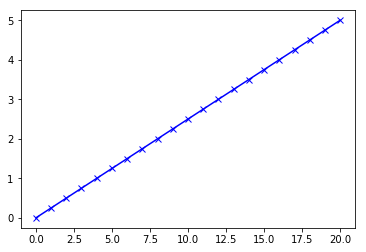

In [18]:
arr1 = np.linspace(0, 5, 21)
plt.plot(arr1, 'bx-') # line plot    

#### Two-dimensional array

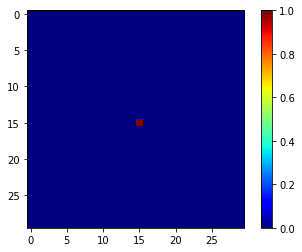

In [19]:
arr2 = np.zeros((30, 30))#np.random.rand(30, 30)
arr2[15,15] = 1
plt.imshow(arr2, cmap=plt.cm.jet)    

plt.colorbar()  

## Let's do math!

In [20]:
## scalar addition
arr = np.linspace(-1, 1, 5)
print(arr, " + 1 = ")
arr + 1

[-1.  -0.5  0.   0.5  1. ]  + 1 = 


array([0. , 0.5, 1. , 1.5, 2. ])

In [21]:
## vector sum
a = np.arange(4).reshape(2,2)
b = -np.arange(4).reshape(2,2)
print('a \n', repr(a), '\nb\n', repr(b))
print('a + b = \n', repr(a+b))

a 
 array([[0, 1],
       [2, 3]]) 
b
 array([[ 0, -1],
       [-2, -3]])
a + b = 
 array([[0, 0],
       [0, 0]])


### Elementwise operations (unlike lists)

A new array is created and filled with the result.

#### Arithmetic operators

```python

    a-b

    b**2

    a < 35

    A*B  # elementwise product

    A.dot(B)  # matrix product
    
```

Some operations, such as += and *=, act in place, modify an existing array rather than create a new one. 

```python
    a *= 3
```

#### Universal Functions (ufunc)

```python
    np.exp()

    np.sqrt()
    
    np.sin()

```
    

#### ⚡ Create an array and use Matplotlib to visualise it


#### ⚡ Create a second array and add it to the first one

    * What happens if the arrays have different sizes?

In [22]:
a = np.arange(10)
b = np.arange(3)
a + 3

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### Broadcasting

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" alt="broadcsting" width="500"/>

Image from Python Data Science Handbook

## Indexing  and slicing

For viewing and assigning values to arrays.

**Like lists**, you can use slicing

```python
arr[ item_index ]
arr[ start : stop ]
arr[ start : stop : step ]
```

**Unlike lists** you can

Use commas to access elements in higher dimensional arrays

```python
arr[ axis1_indices, axis2_indices, ...]
```


In [23]:
a = np.arange(1, 6)
b = np.arange(10, 60, 10)
print("a = {} \nb = {}".format(a, b))

c = b[:, None] + a[None, :]
print('c =\n', c)

a = [1 2 3 4 5] 
b = [10 20 30 40 50]
c =
 [[11 12 13 14 15]
 [21 22 23 24 25]
 [31 32 33 34 35]
 [41 42 43 44 45]
 [51 52 53 54 55]]


View

In [24]:
a[0]

1

Assign values

In [25]:
a[0] = 100
a

array([100,   2,   3,   4,   5])

#### ⚡ What happens if you give less indices than those of the dimensions of the array `c[0]`?

In [26]:
c[0]

array([11, 12, 13, 14, 15])

#### ⚡ How would you access every second row of `c`?

<!-- c[::2] -->

* How about evey second column?

<!-- c[, ::2] -->


Hint: Slicing `[ start : stop : step ]`

Summary of Slicing

<img src="https://scipy-lectures.org/_images/numpy_indexing.png" alt="slicing" width="500"/>



Image from https://scipy-lectures.org

### Advanced indexing

Also called fancy indexing

<img src="https://scipy-lectures.org/_images/numpy_fancy_indexing.png" alt="fancy indexing" width="800"/>

Image from https://scipy-lectures.org

In [27]:
c[np.arange(2),np.arange(2)]

array([11, 22])

#### Boolean indexing 

Selecting based on logical expressions

In [28]:
print( c > 30 )

[[False False False False False]
 [False False False False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [29]:
c[c > 30]

array([31, 32, 33, 34, 35, 41, 42, 43, 44, 45, 51, 52, 53, 54, 55])

## Memory and Views

1.    NumPy arrays are mutable objects
2.    Slices create views into the same memory

*Note:* Advanced indexing *always* creates a copy, slicing *never* creates a copy.

# Summary

1. How to do convenient, fast math with NumPy
2. NumPy arrays
	* **attributes**: size, shape, ndim
    * how to create them: element by element or generating them (linespace, random)
    * operations, slicing and indexing
3. Simple visulisation with Matplotlib

# References

These slides are a collage of

* https://github.com/MPIDS/introduction_to_programming 
* https://github.com/MPIDS/Python-Course/tree/master/03-numpy-scipy/talks
* https://scipy-lectures.org/intro/numpy/array_object.html
* https://docs.scipy.org/doc/numpy-dev/user/quickstart.html


### Images

* NumPy logo -- David Cournapeau [BSD (http://opensource.org/licenses/bsd-license.php)]

* Python Scientific Stack -- https://image.slidesharecdn.com/scientific-python-151121091532-lva1-app6892/95/scientific-python-28-638.jpg?cb=1448101074

* NumPy Arrays -- https://medium.com/datadriveninvestor/artificial-intelligence-series-part-2-numpy-walkthrough-64461f26af4f

* Broadcasting -- https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

* Slicing summary -- https://scipy-lectures.org/intro/numpy/array_object.html

* Fancy indexing -- https://scipy-lectures.org/_images/numpy_fancy_indexing.png